# HIGER ORDER POLYNOMIAL REGRESSION AND REGULARIZATION

In this blog we will get to know about Polynomial Regression


Importing necessary modules
and implementing regression 

In [94]:
import numpy as np
import random, torch, math
from torch.autograd import Variable as var
import pandas as pd
import matplotlib.pyplot as plt

n_points = 100 # Number of points
x = np.linspace(0, 1, num=n_points)# Sample n_points
z = np.sin(2*np.pi*x)# Create sine wave of sampled n_points

train_x = torch.tensor(x[0:10]); 
test_x = torch.tensor(x[10:]);
train_y = torch.tensor(z[0:10]); 
test_y = torch.tensor(z[10:]);
length_train = len(train_x)

Plotting the sine wave 

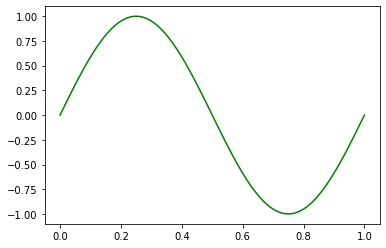

In [95]:
# Plot
import matplotlib.pyplot as plt
plt.figure
plt.plot(x, z, 'g-')

Creating Sample Gaussian Noise

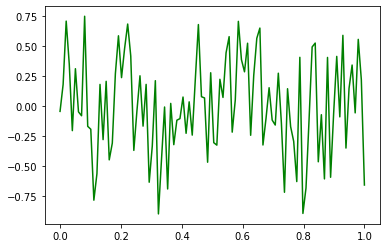

In [96]:
eta = .4*np.random.normal(0,1,n_points) #Add Gaussian noise of mean 0 and standard deviation 1

# Plot
import matplotlib.pyplot as plt
plt.figure
plt.plot(x, eta, 'g-')

Creating noisy sine wave

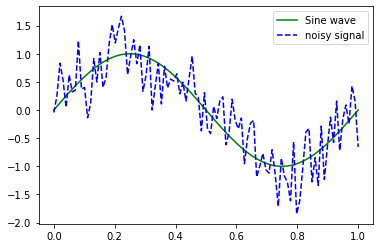

In [97]:

t = z+eta

# Plot
import matplotlib.pyplot as plt
plt.figure
plt.plot(x, z, 'g-',x,t,'b--') #z is the original sine signal and t is the noisy signal
plt.legend(('Sine wave', 'noisy signal'))

Sine wave plot with 10 sample gaussian noises randomly

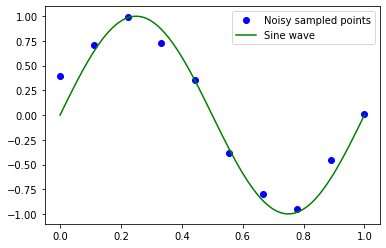

In [98]:
# 10 points from the noisy sin(2*pi*x)
import numpy as np

sample_points = 10

x_sampled = np.linspace(0, 1, num=sample_points)
t_sampled = np.sin(2*np.pi*x_sampled)+0.1*np.random.normal(0,1,sample_points) #Add noise of mean 0 and standard deviation 1 

# Plot
import matplotlib.pyplot as plt
plt.figure
plt.plot(x_sampled, t_sampled, 'bo',x, z, 'g-')
plt.legend(('Noisy sampled points', 'Sine wave'))

Now, Using Gradient Descent for finding coefficient

Degree 0 Polynomial

Coefficients are [0.05948887]
Mean Square Error =  2.081867876074035


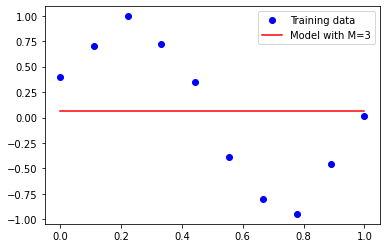

In [99]:

# Input x_sampled and t_sampled (N=10 sampled points)
np.random.seed(1)
M = 0 #order
coeff = np.polyfit(x_sampled, t_sampled, M) # Fitting the polynomial and finding coefficients
print('Coefficients are', coeff)
p = np.poly1d(coeff)# Polynomial construction
y_pred = p(x_sampled)

plt.figure
plt.plot(x_sampled, t_sampled, 'bo', x_sampled, y_pred, 'r-')
plt.legend(('Training data', 'Model with M=3'))



# Compute Mean square error (MSE)
err = 0.5*(np.sum((y_pred-t_sampled)**2))
print ("Mean Square Error = ",err) #Training error

Degree 1 polynomial 

Coefficients are [-1.38272521  0.68164852]
Mean Square Error =  1.1746525231816691


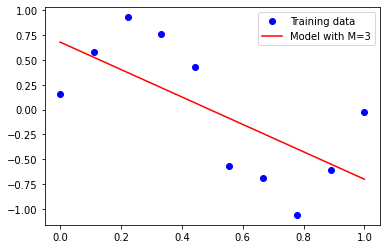

In [100]:
sample_points = 10

x_sampled = np.linspace(0, 1, num=sample_points)
t_sampled = np.sin(2*np.pi*x_sampled)+0.1*np.random.normal(0,1,sample_points) #Add noise of mean 0 and standard deviation 1 

# Input x_sampled and t_sampled (N=10 sampled points)
np.random.seed(1)
M = 1 #order
coeff = np.polyfit(x_sampled, t_sampled, M) # Fitting the polynomial and finding coefficients
print('Coefficients are', coeff)
p = np.poly1d(coeff)# Polynomial construction
y_pred = p(x_sampled)

plt.figure
plt.plot(x_sampled, t_sampled, 'bo', x_sampled, y_pred, 'r-')
plt.legend(('Training data', 'Model with M=3'))



# Compute Mean square error (MSE)
err = 0.5*(np.sum((y_pred-t_sampled)**2))
print ("Mean Square Error = ",err) #Training error

Degree 3 Polynomial

Coefficients are [ 19.19427742 -28.4022851    9.15229425   0.07579167]
Mean Square Error =  0.0979077531233955


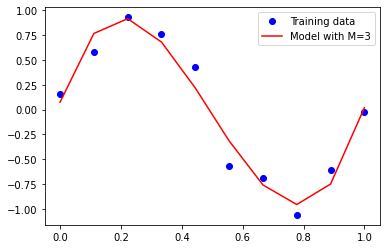

In [101]:
sample_points = 10

x_sampled = np.linspace(0, 1, num=sample_points)
t_sampled = np.sin(2*np.pi*x_sampled)+0.1*np.random.normal(0,1,sample_points) #Add noise of mean 0 and standard deviation 1 

# Input x_sampled and t_sampled (N=10 sampled points)
np.random.seed(1)
M = 3 #order
coeff = np.polyfit(x_sampled, t_sampled, M) # Fitting the polynomial and finding coefficients
print('Coefficients are', coeff)
p = np.poly1d(coeff)# Polynomial construction
y_pred = p(x_sampled)

plt.figure
plt.plot(x_sampled, t_sampled, 'bo', x_sampled, y_pred, 'r-')
plt.legend(('Training data', 'Model with M=3'))



# Compute Mean square error (MSE)
err = 0.5*(np.sum((y_pred-t_sampled)**2))
print ("Mean Square Error = ",err) #Training error

Degree 9 Polynomial

Coefficients are [-6.98972014e+04  3.11266142e+05 -5.81424023e+05  5.91605087e+05
 -3.56189244e+05  1.28891777e+05 -2.71059835e+04  2.97714385e+03
 -1.23885092e+02  1.62434536e-01]
Mean Square Error =  6.39839390860706e-20


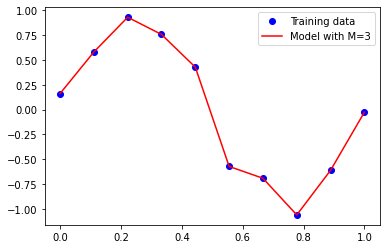

In [102]:
sample_points = 10

x_sampled = np.linspace(0, 1, num=sample_points)
t_sampled = np.sin(2*np.pi*x_sampled)+0.1*np.random.normal(0,1,sample_points) #Add noise of mean 0 and standard deviation 1 

# Input x_sampled and t_sampled (N=10 sampled points)
np.random.seed(1)
M = 9 #order
coeff = np.polyfit(x_sampled, t_sampled, M) # Fitting the polynomial and finding coefficients
print('Coefficients are', coeff)
p = np.poly1d(coeff)# Polynomial construction
y_pred = p(x_sampled)

plt.figure
plt.plot(x_sampled, t_sampled, 'bo', x_sampled, y_pred, 'r-')
plt.legend(('Training data', 'Model with M=3'))



# Compute Mean square error (MSE)
err = 0.5*(np.sum((y_pred-t_sampled)**2))
print ("Mean Square Error = ",err) #Training error

Table with weights

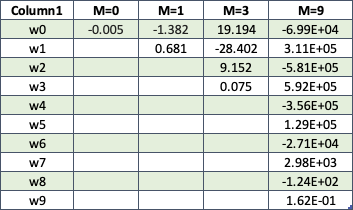


Adding new samples and comparing

Text(0.5, 1.0, 'Fitted Polynomial of Degree 9 for 100 data points')

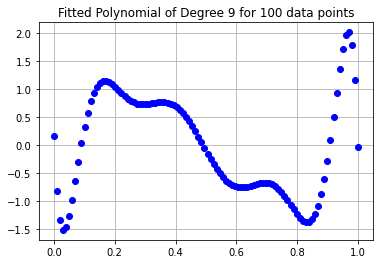

In [127]:
#Check the output of new data points
n = 200
x_new = np.random.uniform(0, 1, 200)
eta = 0.2*np.random.normal(0,1,n) #Add noise of mean 0 and standard deviation 1
y_new = np.sin(2*np.pi*x_new)+eta 

y_new_pred = p(x_new)

x_axis = np.linspace(0,1,100)
plt.figure
plt.plot(x_axis,p(x_axis),'bo')
plt.grid()
plt.title("Fitted Polynomial of Degree 9 for 100 data points")

Plots for all the coefficients

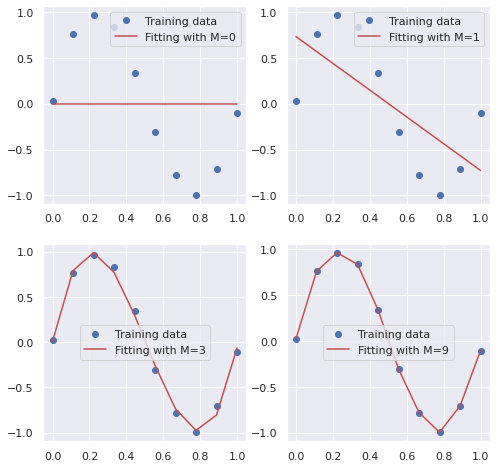

In [173]:
plt.figure(figsize=(8,8))
for j,i in enumerate([0,1,3,9]):
    z = np.polyfit(x_sampled, t_sampled, i) # Fitting the polynomial and finding coefficients
    p = np.poly1d(z)# 3rd order polynomial construction
    y = p(x_sampled)
#     plt.figure
    plt.subplot(2, 2,j+1)
    plt.plot(x_sampled, t_sampled, 'bo', x_sampled,y,'r-')
    plt.legend(('Training data', 'Fitting with M='+str(i)))

[0.6718839839061639, 0.3949820650144116, 0.362185294183138, 0.15509957090719734, 0.1257616863153283, 0.11667502425249053, 0.11033312782105564, 0.05139960801508042, 0.045984709291081345, 2.7116532461094445e-08]
[0.6757748998054574, 0.5130767396803901, 0.6430332529224712, 0.40209758302055293, 0.7368997594930184, 0.3663105838641724, 0.5101256658169809, 6.711239341941148, 37.9374792351037, 5445.918996816799]


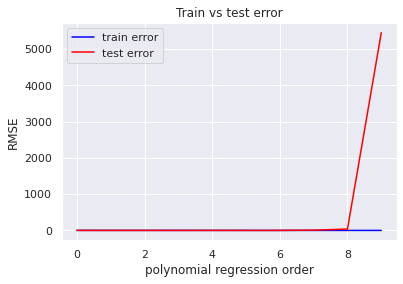

In [188]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


train_y=[0.17118032297090804, -0.256804412241356, 0.5851231274205356, 0.10588092999601144, -0.6024247587809445, 1.0049247993821213, -0.736825317156796, 1.2956949620125484, -0.3967761741926047, -0.5892503704887883]
train_x=[0.5065954955910669, 0.5263439330297612, 0.1214192124185125, 0.5172432303376305, 0.8921640831936551, 0.18419264043506622, 0.5952343194155714, 0.2769567933749101, 0.9539864651937019, 0.6447929132040842]
test_y=[0.7978880906437485, 0.5895734297086033, 0.3578881765720981, 0.25089975161344724, -0.7936818285922409, -0.936714234036075, -0.35814693610200166, 0.4817575235401146, 0.9906810553573294, -0.7618254109321836]
test_x=[0.11412767018169767, 0.13430512749327617, 0.08835000898166301, 0.004443786589970133, 0.7443958469077984, 0.7228672268923204, 0.9518796439477641, 0.43505269159444815, 0.33320901738865893, 0.6394843916912883]

train_x=np.array(train_x)
train_y=np.array(train_y)
test_x=np.array(test_x)
test_y=np.array(test_y)
train_x=train_x.reshape(-1,1)
train_y=train_y.reshape(-1,1)
test_x=test_x.reshape(-1,1)
test_y=test_y.reshape(-1,1)


train_errors=[]
test_errors=[]

for i in range (0,10):
  polynomial_features = PolynomialFeatures(degree = i)
  x_transf=polynomial_features.fit_transform(train_x)

  model.fit(x_transf,train_y)

  y_new=model.predict(x_transf) 

  #training error
  rmse=np.sqrt(mean_squared_error(train_y,y_new))
  #test error
  x_transf=polynomial_features.fit_transform(test_x)
  y_new=model.predict(x_transf)
  rmse2=np.sqrt(mean_squared_error(test_y,y_new))

  train_errors.append(rmse)
  test_errors.append(rmse2)


print(train_errors)
print(test_errors)
models= np.linspace(0, 9, 10)
plt.plot(models,train_errors,label = 'train error', color = 'blue')
plt.plot(models,test_errors,label = 'test error', color = 'red')
plt.title('Train vs test error')
plt.xlabel('polynomial regression order')
plt.ylabel('RMSE')
plt.legend()
plt.show()
   
  


L2 Regularization 

Plotting for Lambda 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000

cost:108617.221743442 	 iteration: 0
cost:11662.254456429027 	 iteration: 1
cost:3362.979850968554 	 iteration: 2
cost:2644.9664551008946 	 iteration: 3
cost:2575.3015008990624 	 iteration: 4


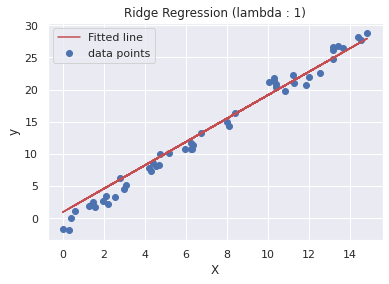

cost:872009.0904915397 	 iteration: 0
cost:75908.87446321837 	 iteration: 1
cost:7746.3757005872585 	 iteration: 2
cost:1908.6329972605774 	 iteration: 3
cost:1407.036808825191 	 iteration: 4


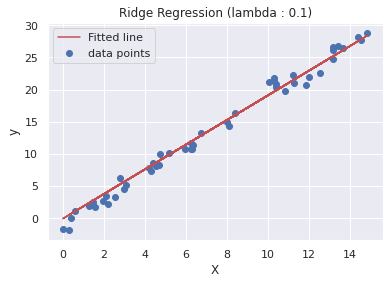

cost:665399.9946381378 	 iteration: 0
cost:57926.77806053913 	 iteration: 1
cost:5909.515482582452 	 iteration: 2
cost:1455.2651357904256 	 iteration: 3
cost:1073.7776150741652 	 iteration: 4


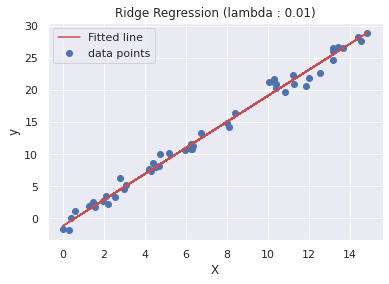

cost:497936.4000531091 	 iteration: 0
cost:44013.89337446901 	 iteration: 1
cost:5141.981580442293 	 iteration: 2
cost:1810.7956108389794 	 iteration: 3
cost:1522.9711632288158 	 iteration: 4


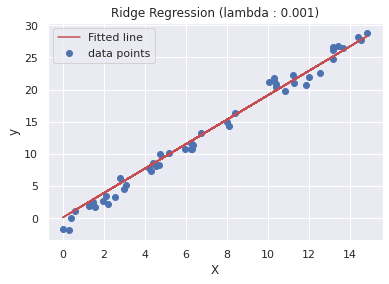

cost:491429.0428676975 	 iteration: 0
cost:44215.78002110111 	 iteration: 1
cost:5913.833770505491 	 iteration: 2
cost:2626.981997787131 	 iteration: 3
cost:2338.5125292167236 	 iteration: 4


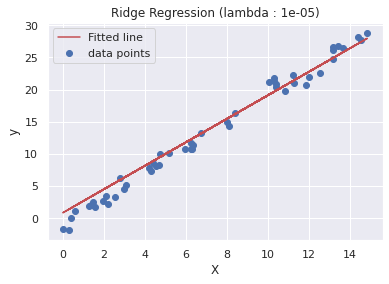

cost:6173.454452059654 	 iteration: 0
cost:1593.4150543612336 	 iteration: 1
cost:1200.4602010814192 	 iteration: 2
cost:1166.0496967811698 	 iteration: 3
cost:1162.3458345552108 	 iteration: 4


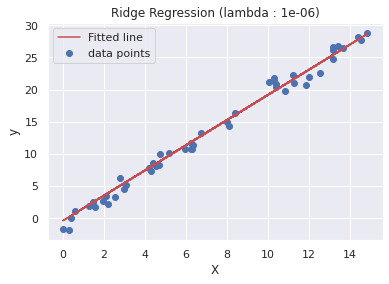

In [141]:
# import the necessary packages
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='darkgrid')



def ridge_regression(X, y, alpha=0.01, lambda_value=1, epochs=30):
    """
    :param x: feature matrix
    :param y: target vector
    :param alpha: learning rate (default:0.01)
    :param lambda_value: lambda (default:1)
    :param epochs: maximum number of iterations of the
           linear regression algorithm for a single run (default=30)
    :return: weights, list of the cost function changing overtime
    """
 
    m = np.shape(X)[0]  # total number of samples
    n = np.shape(X)[1]  # total number of features
 
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    W = np.random.randn(n + 1, )
 
    # stores the updates on the cost function (loss function)
    cost_history_list = []
 
    # iterate until the maximum number of epochs
    for current_iteration in np.arange(epochs):  # begin the process
 
        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)
 
        # calculate the difference between the actual and predicted value
        error = y_estimated - y
 
        # regularization term
        ridge_reg_term = (lambda_value / 2 * m) * np.sum(np.square(W))
 
        # calculate the cost (MSE) + regularization term
        cost = (1 / 2 * m) * np.sum(error ** 2) + ridge_reg_term
 
        # Update our gradient by the dot product between
        # the transpose of 'X' and our error + lambda value * W
        # divided by the total number of samples
        gradient = (1 / m) * (X.T.dot(error) + (lambda_value * W))
 
        # Now we have to update our weights
        W = W - alpha * gradient
 
        # Let's print out the cost to see how these values
        # changes after every iteration
        print(f"cost:{cost} \t iteration: {current_iteration}")
 
        # keep track the cost as it changes in each iteration
        cost_history_list.append(cost)
 
    return W, cost_history_list




def graph():
    rng = np.random.RandomState(1)
    x = 15 * rng.rand(50)
    X = x.reshape(-1, 1)
 
    y = 2 * x - 1 + rng.randn(50)
 
    lambda_list = [1,0.1,0.01,0.001,0.00001,0.000001]
 
    for lambda_ in lambda_list:
        # calls ridge regression function with different values of lambda
        weight, _ = ridge_regression(X, y, alpha=0.01,
                                     lambda_value=lambda_, epochs=5)
 
        fitted_line = np.dot(X, weight[1]) +weight[0]
        plt.scatter(X, y, label='data points')
        plt.plot(X, fitted_line, color='r', label='Fitted line')
        plt.xlabel("X")
        plt.ylabel("y")
        plt.title(f"Ridge Regression (lambda : {lambda_})")
        plt.legend()
        plt.show()
 
 

graph()

Model Suitable: From above grapth we can conclude that model with Lambda = 0.00001 performed better than other lambda close to one. 

Conclusion:


As we can see from the above experiments that polynomial model with higher degree representation have better performance and perform better in testing stage than lower order polynomial model.

# Overfitting

Overfitting refers to a model that models the training data too well.

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.


For example, decision trees are a nonparametric machine learning algorithm that is very flexible and is subject to overfitting training data. This problem can be addressed by pruning a tree after it has learned in order to remove some of the detail it has picked up.


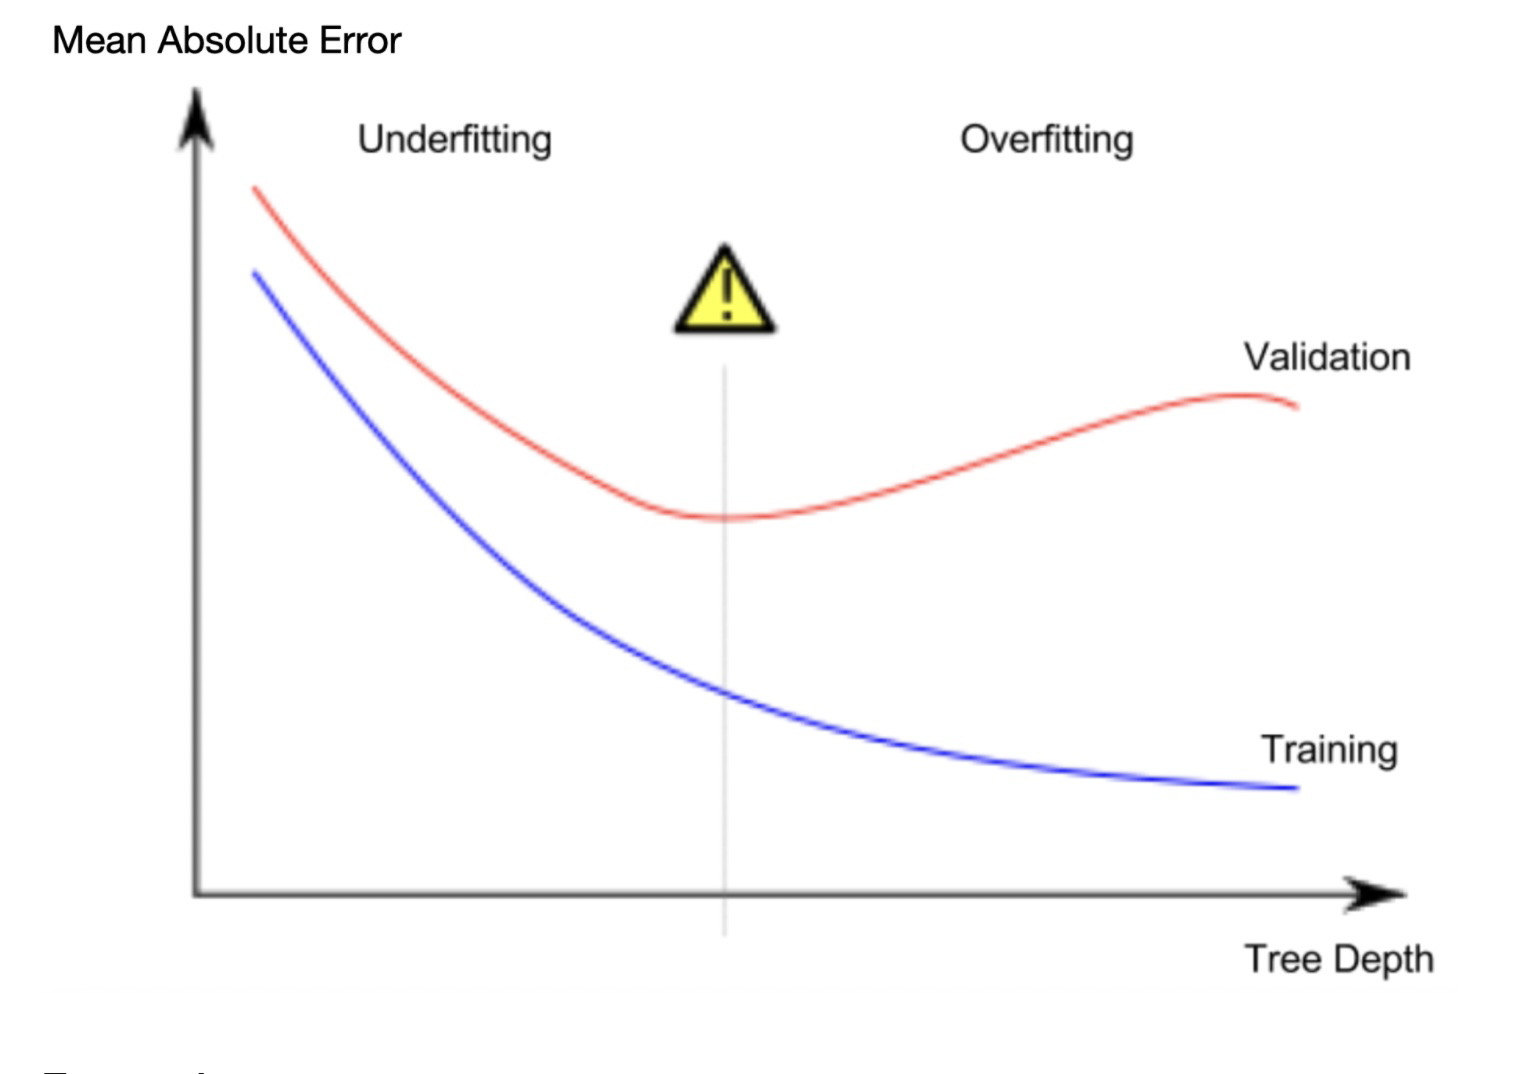

# Underfitting

Underfitting refers to a model that can neither model the training data nor generalize to new data.

An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

Underfitting is often not discussed as it is easy to detect given a good performance metric. The remedy is to move on and try alternate machine learning algorithms. 

# Challenges

First challenge i faced was the calculation of regression without using scikit-learn, then i figured out the way through our class lecture in which professor taught us the way to solve it.

It is still a task for me to find out the comparision in train and test error, through this blog. I managed to calculate and generate the graph between train and test error.

Thanks for providing an oppurtunity, as I learned Polynomial regression and Regularization in depth.

# References



*   Class Lectures
*   [https://www.youtube.com/watch?v=d0CEu2hi3wQ](https://https://www.youtube.com/watch?v=d0CEu2hi3wQ)


*   [https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)
*   [https://towardsdatascience.com/polynomial-regression-bbe8b9d97491](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)


*   [https://stackoverflow.com/questions/38191855/zero-pad-numpy-array](https://stackoverflow.com/questions/38191855/zero-pad-numpy-array)










